In [3]:
import pandas as pd

df = pd.read_csv("data/gentrified_data_Austin.csv")

df.head()

,zip_code,msa_name,income,gentrified
0,64401,"St. Joseph, MO-KS MSA",96142.0,True
1,64421,"St. Joseph, MO-KS MSA",72750.0,True
2,64422,"St. Joseph, MO-KS MSA",75000.0,True
3,64427,"St. Joseph, MO-KS MSA",62448.0,False
4,64430,"St. Joseph, MO-KS MSA",83105.0,True


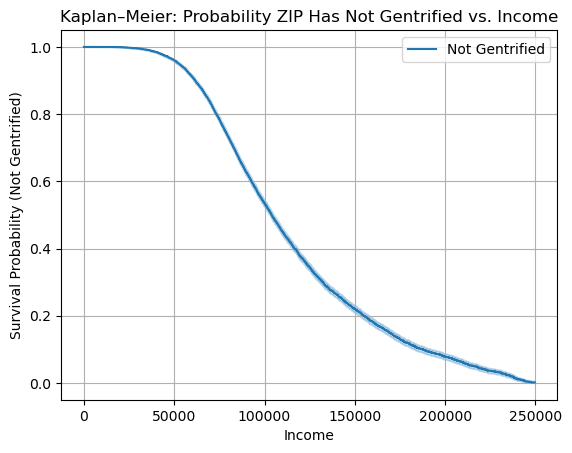

In [8]:
#install lifelines first
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

df["event"] = df["gentrified"].astype(int)
df["income_truncated"] = df["income"].clip(upper = 300000)

kmf.fit(durations = df["income_truncated"], event_observed = df["event"], label = "Not Gentrified")
kmf.plot_survival_function()
plt.title("Kaplan–Meier: Probability ZIP Has Not Gentrified vs. Income")
plt.xlabel("Income")
plt.ylabel("Survival Probability (Not Gentrified)")
plt.grid(True)
plt.show()